In [80]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from modules import *

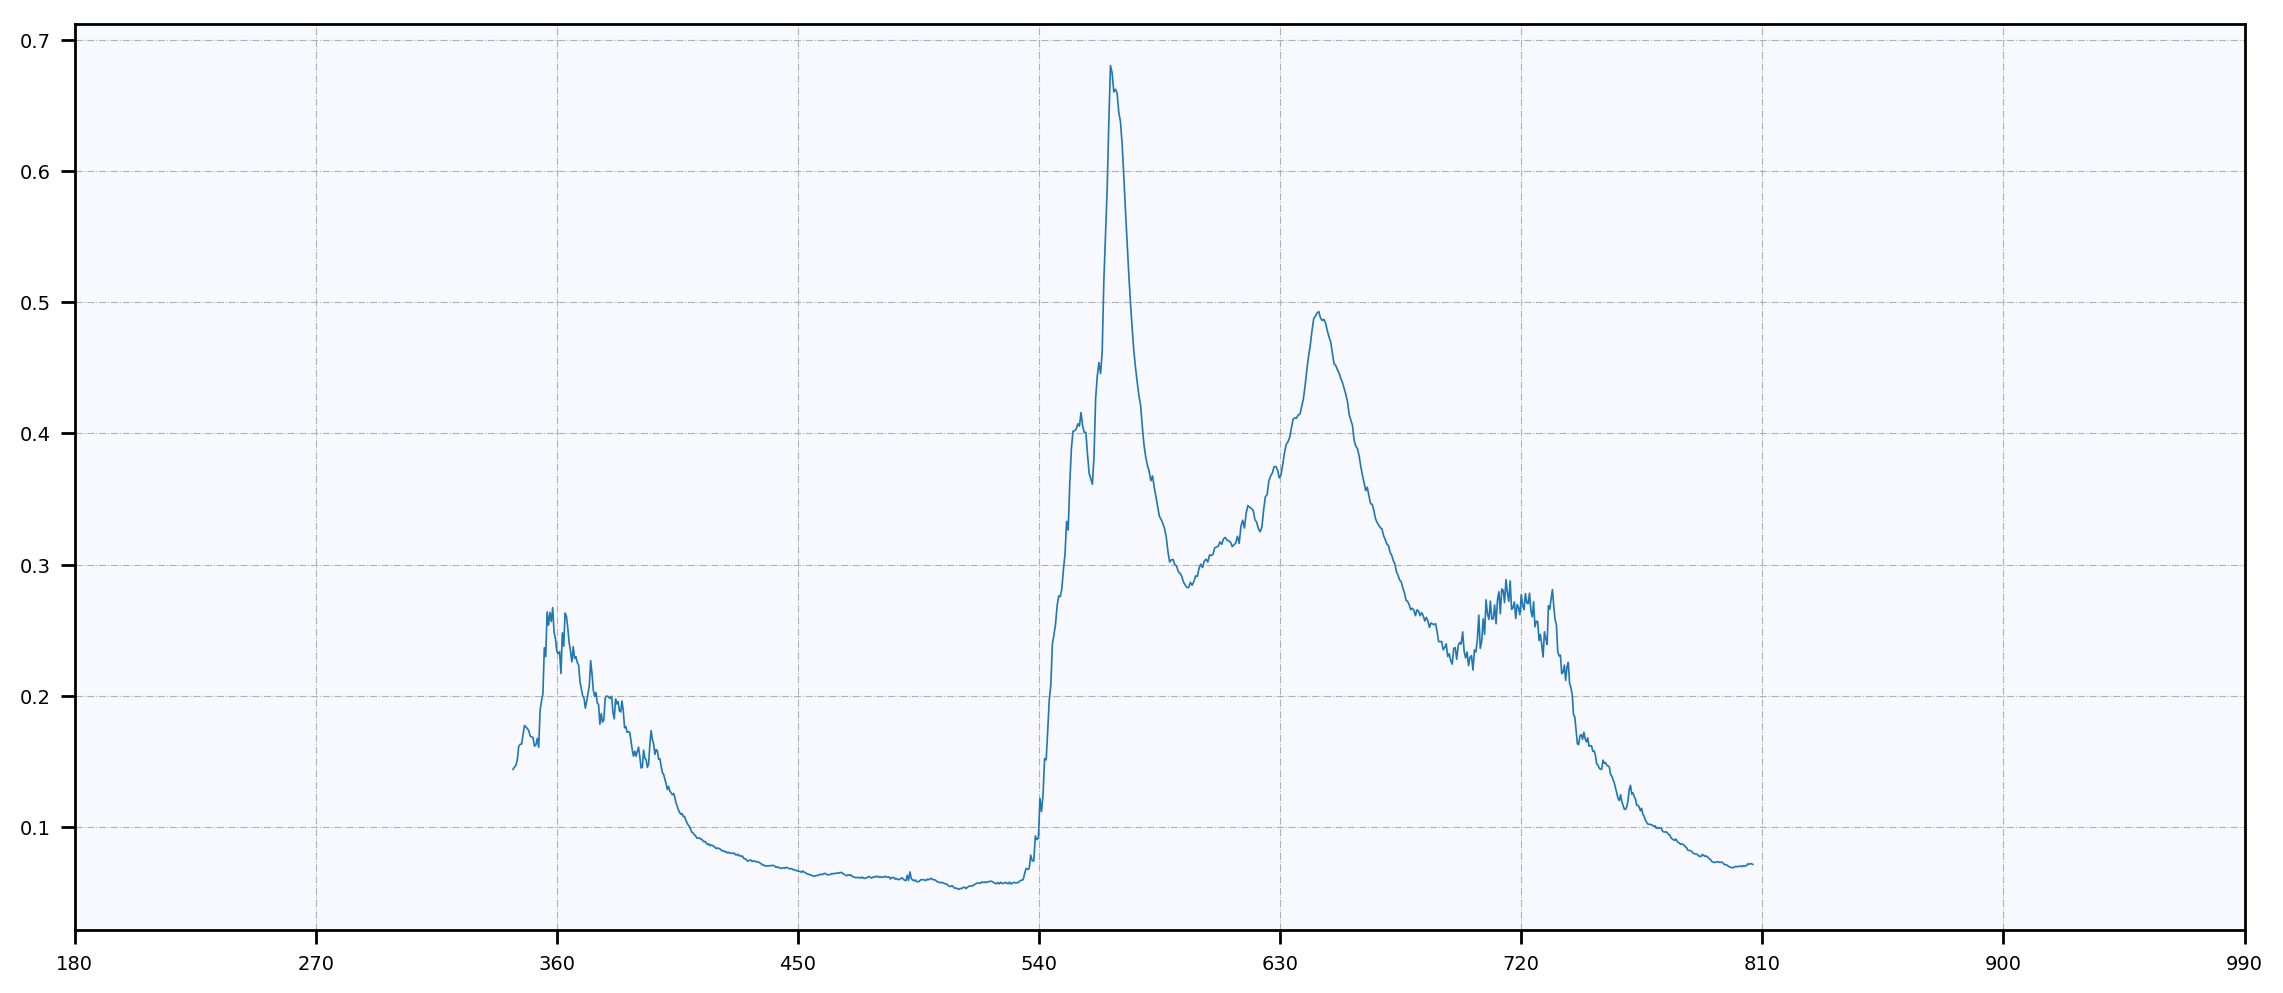

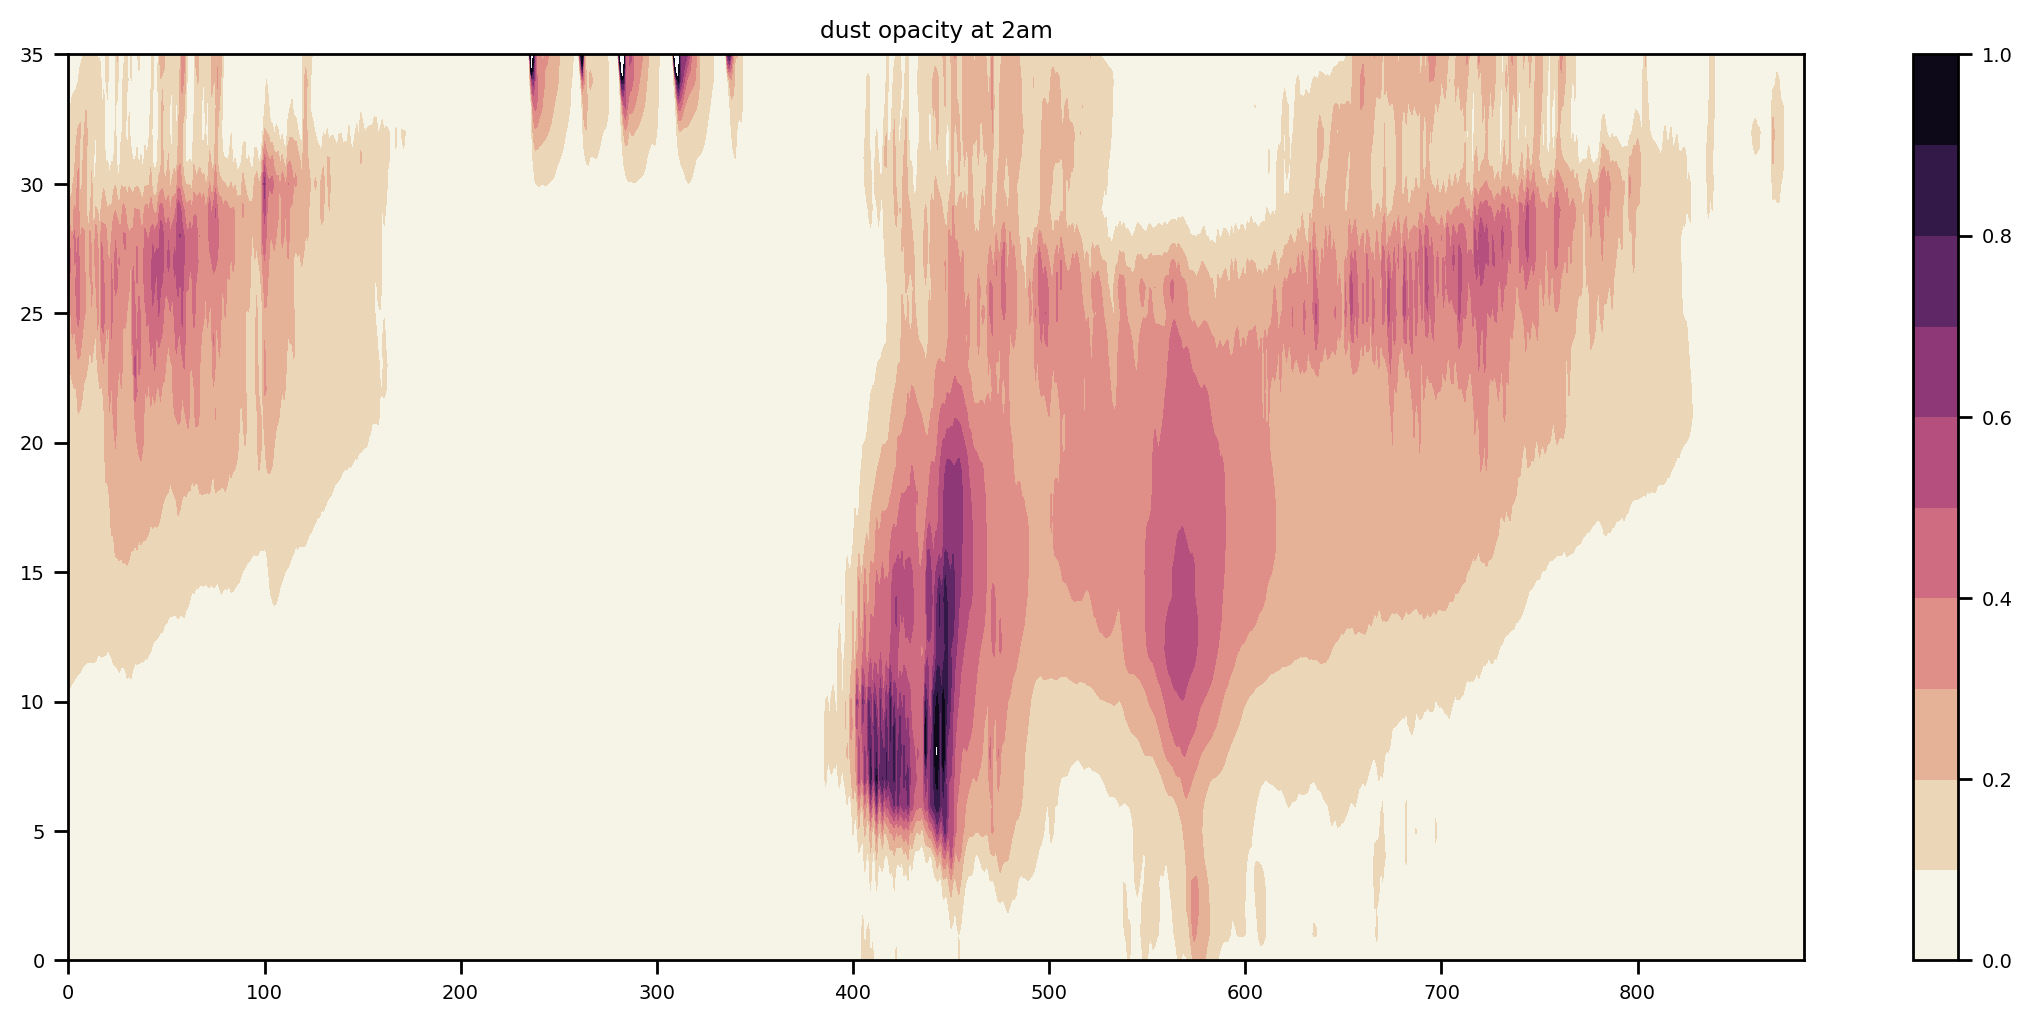

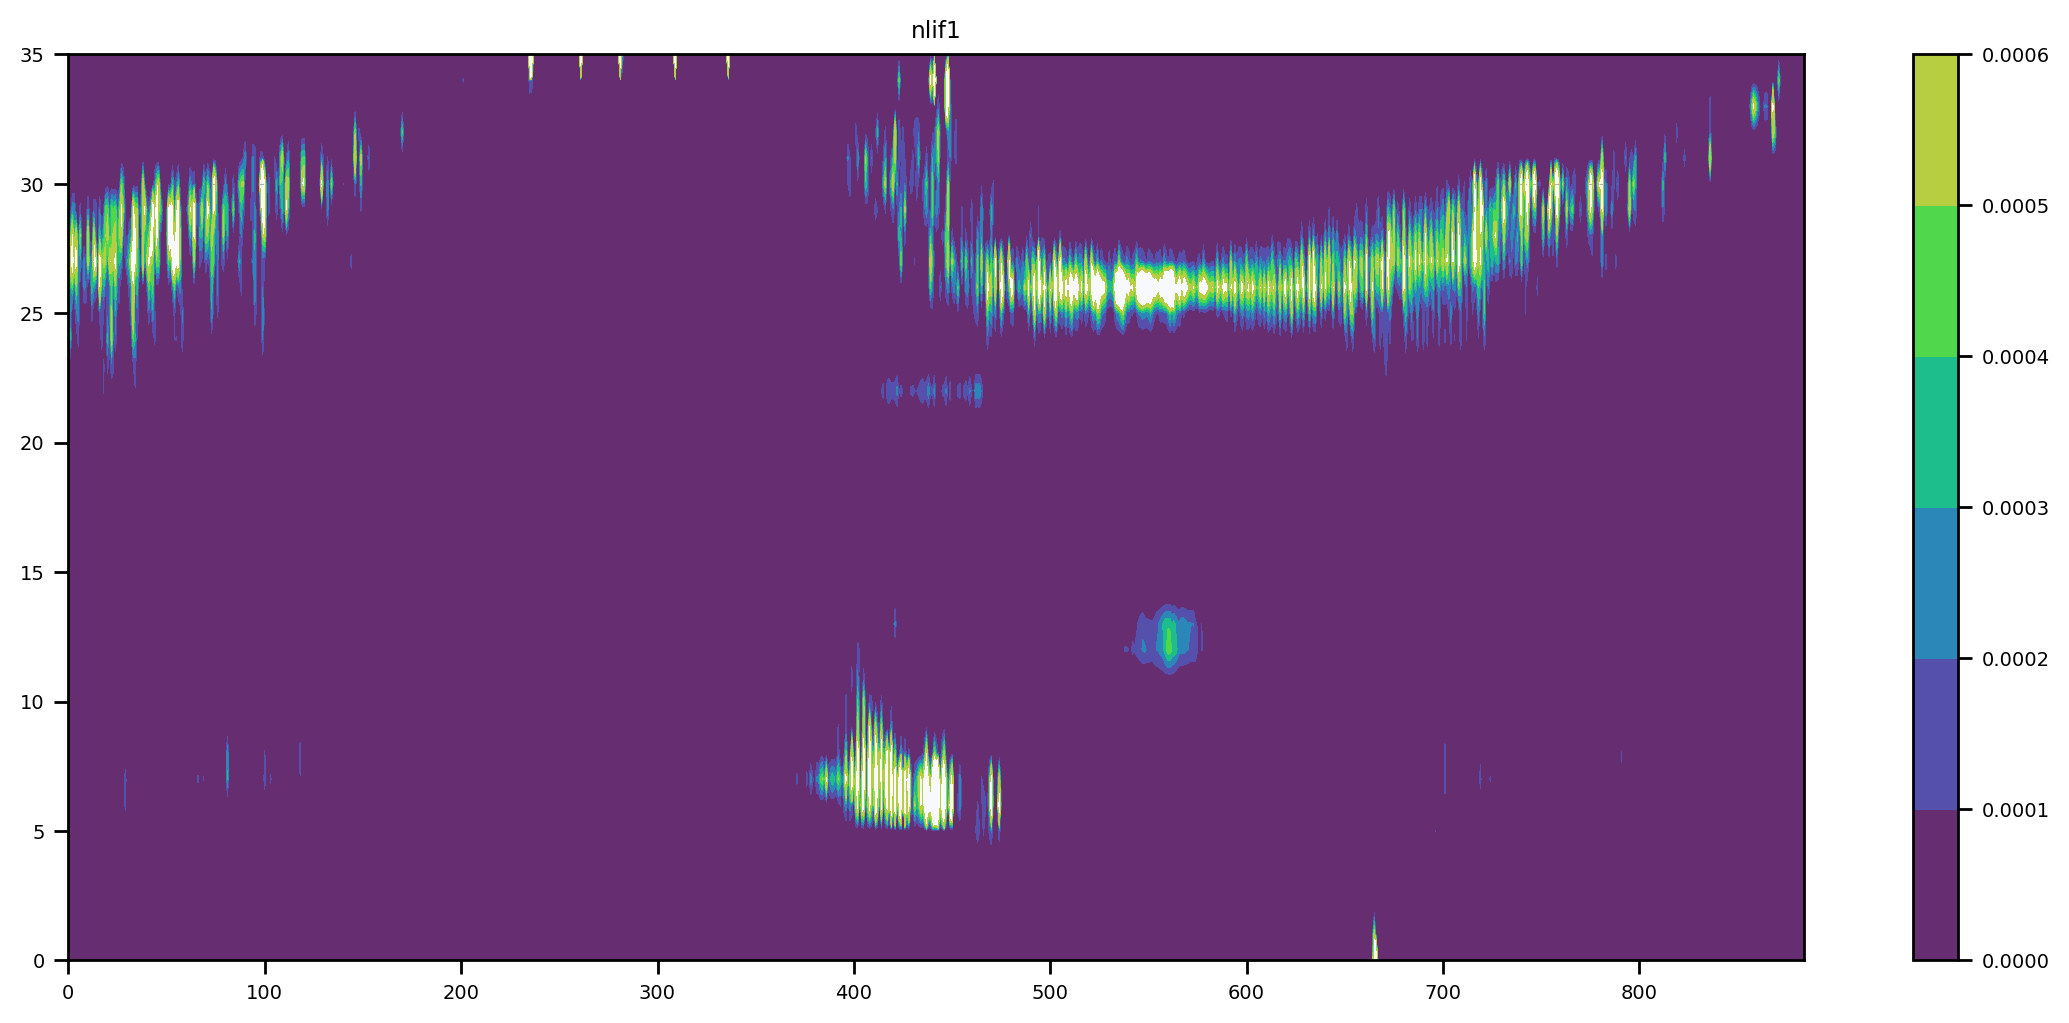

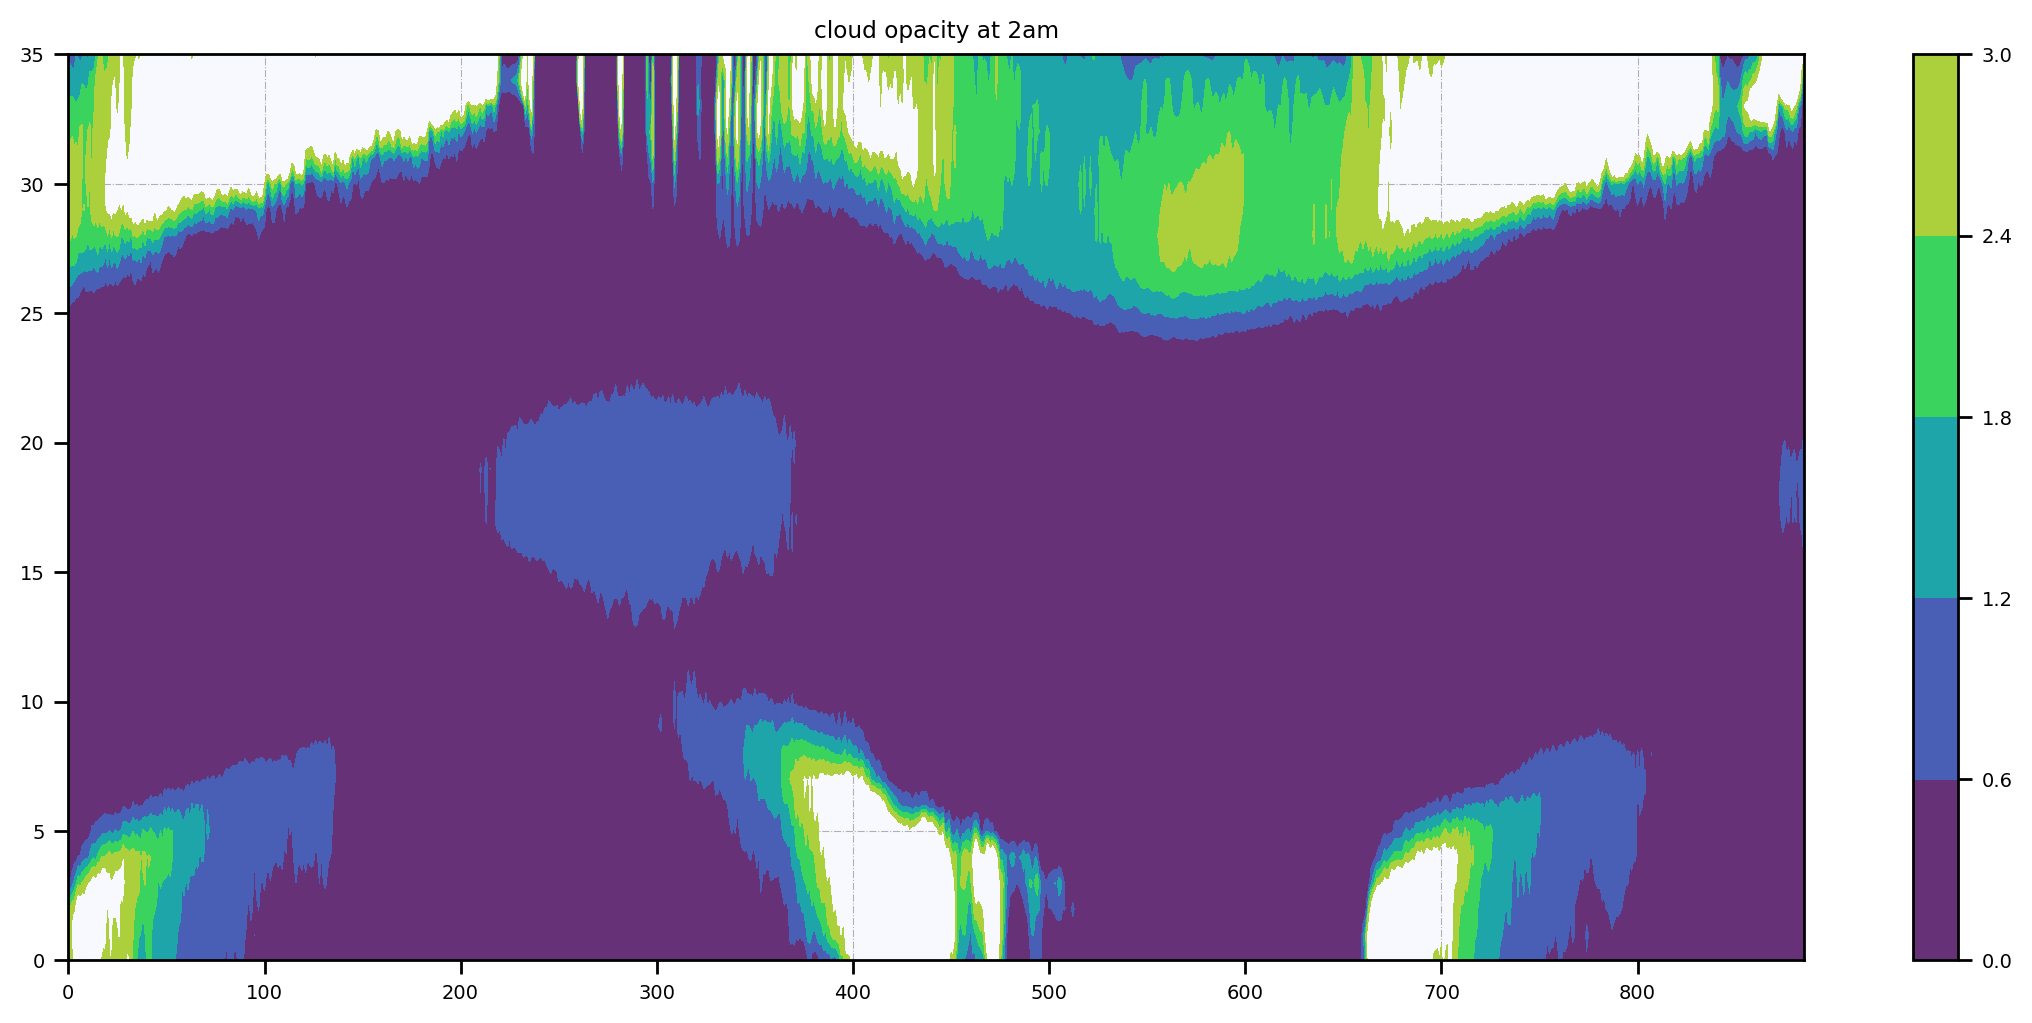

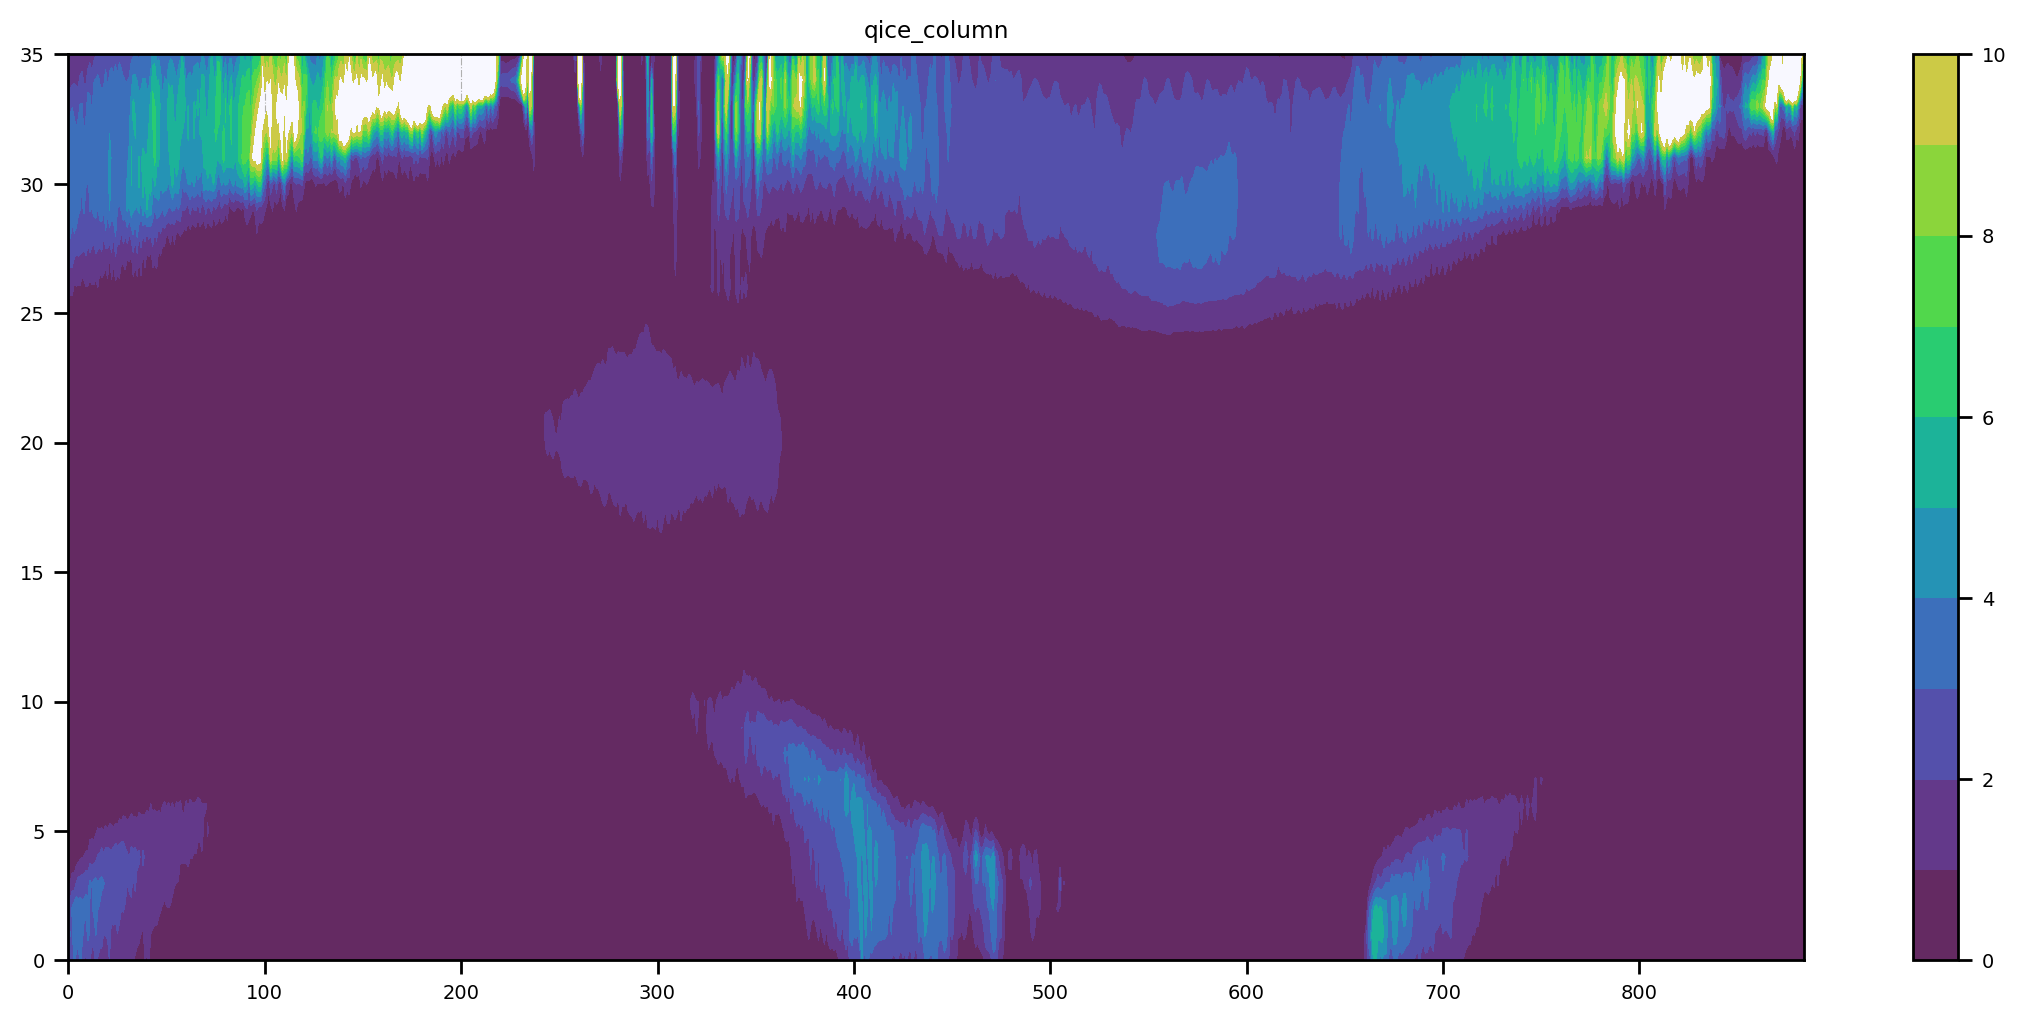

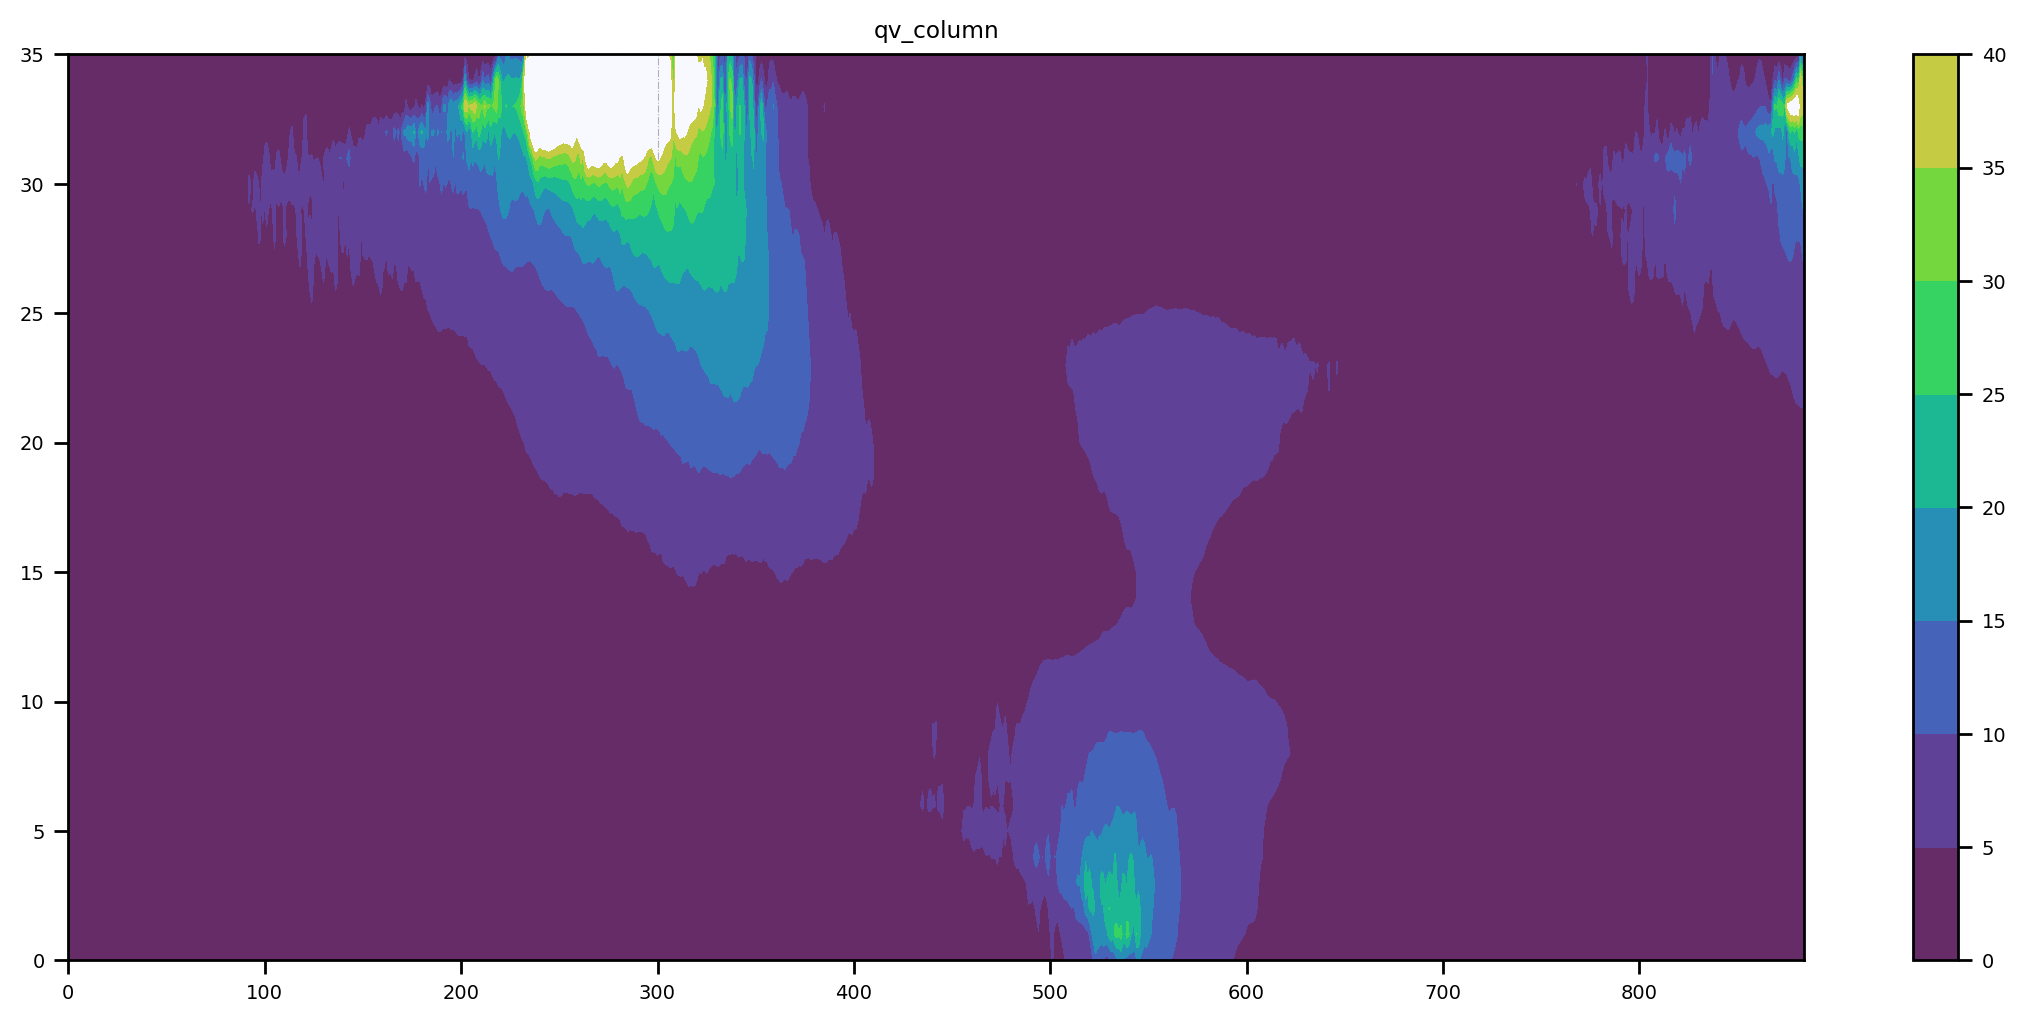

In [82]:
filedir = './wetL50ice_auxhist9.nc'
data = Dataset(filedir,'r')
ls = data.variables['LS'][:]
tau_od = data.variables['TAU_OD2D_AM'][:]
tau_cl = data.variables['TAU_CL2D_AM'][:]
tdiff = data.variables['T_PHY_DIFF'][:]
tpm = data.variables['T_PHY_AVG'][:]
data.close()

filedir = './wetL50ice_wrfout.nc'
data = Dataset(filedir,'r')
ls2 = data.variables['LS'][:]
nlif = data.variables['NLIF1'][:].mean(axis=2)
qi = data.variables['QI_COLUMN'][:].mean(axis=2)
qv = data.variables['QV_COLUMN'][:].mean(axis=2)
t = data.variables['T'][:]
p = data.variables['P'][:]
data.close()

major_ticks = np.arange(180, 360*3, 90)  
fig, ax = plt.subplots(nrows=1, ncols=1)
ls = yearly_ls(ls)
plot(ls, tau_od.mean(axis=2).T[18])
xticks(major_ticks)

fig, axes = plt.subplots(nrows=1, ncols=1)
contourf( (tau_od).mean(axis=2).T, np.linspace(0,1,11), cmap=cb2)
title('dust opacity at 2am')
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1)
contourf( nlif.T, np.linspace(0,6e-4,7), cmap=cb)
title('nlif1')
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1)
contourf( tau_cl[:].mean(axis=2).T, np.linspace(0,3,6), cmap=cb)
title('cloud opacity at 2am')
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1)
contourf( qi.T, np.linspace(0,10,11), cmap=cb)
title('qice_column')
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1)
contourf( qv.T, np.linspace(0,40,9), cmap=cb)
title('qv_column')
colorbar()

p = martians_year(ls2, p)
t = martians_year(ls2, t)
ls2 = martians_year(ls2, ls2)
p = martians_month(ls2, p)

tdiff = martians_year(ls, tdiff)
tau_od = martians_year(ls, tau_od)
tau_cl = martians_year(ls, tau_cl)
ls = martians_year(ls, ls)


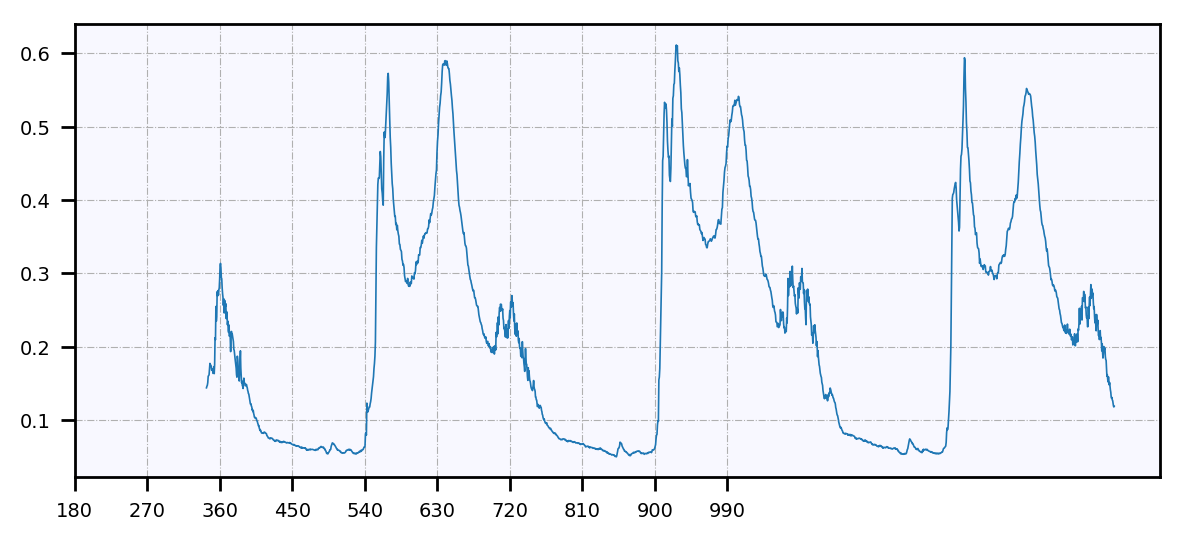

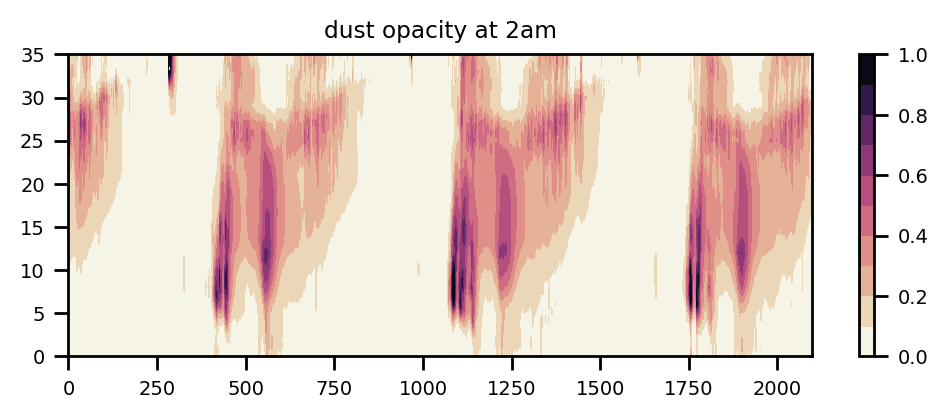

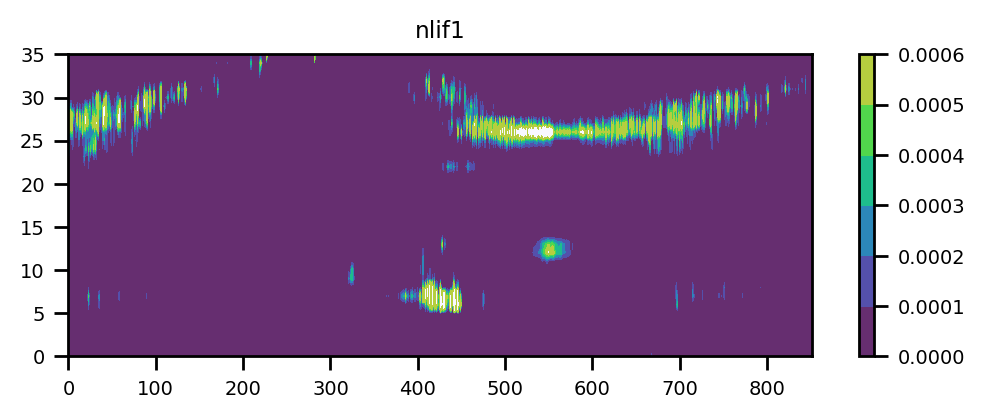

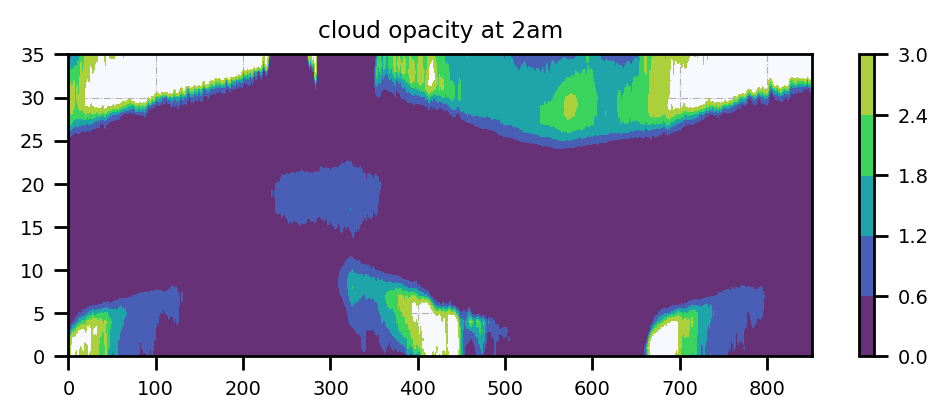

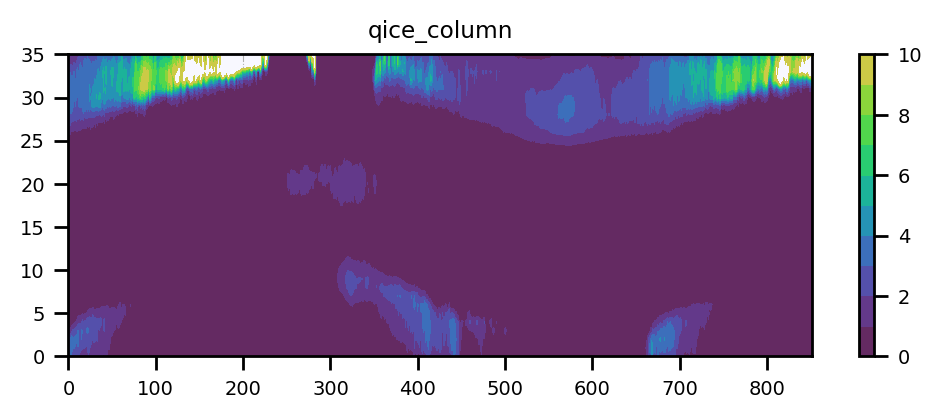

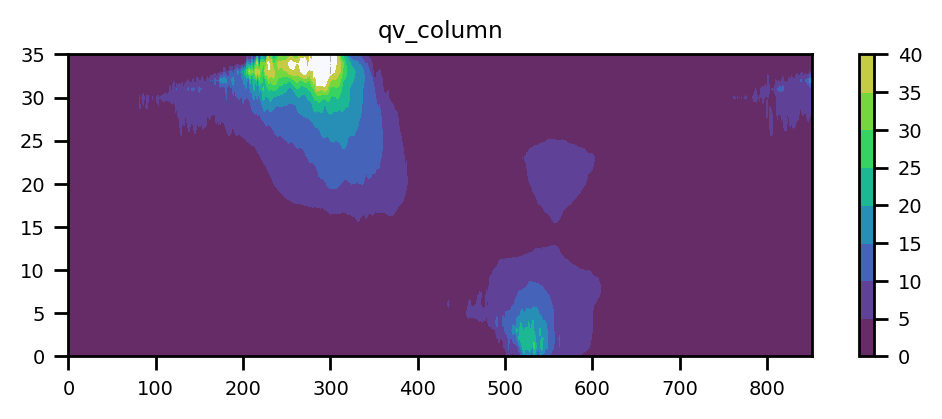

In [15]:
filedir = './wetL50_auxhist9.nc'
data = Dataset(filedir,'r')
ls = data.variables['LS'][:]
tau_od = data.variables['TAU_OD2D_AM'][:]
tau_cl = data.variables['TAU_CL2D_AM'][:]
tdiff = data.variables['T_PHY_DIFF'][:]
tpm = data.variables['T_PHY_AVG'][:]
data.close()

filedir = './wetL50_wrfout.nc'
data = Dataset(filedir,'r')
ls2 = data.variables['LS'][:]
nlif = data.variables['NLIF1'][:].mean(axis=2)
qi = data.variables['QI_COLUMN'][:].mean(axis=2)
qv = data.variables['QV_COLUMN'][:].mean(axis=2)
t = data.variables['T'][:]
p = data.variables['P'][:]
data.close()

major_ticks = np.arange(180, 360*3, 90)  
fig, ax = plt.subplots(nrows=1, ncols=1)
ls = yearly_ls(ls)
plot(ls, tau_od.mean(axis=2).T[18])
xticks(major_ticks)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
contourf( (tau_od).mean(axis=2).T, np.linspace(0,1,11), cmap=cb2)
title('dust opacity at 2am')
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
contourf( nlif.T, np.linspace(0,6e-4,7), cmap=cb)
title('nlif1')
xlim([0,852])
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
contourf( tau_cl[:].mean(axis=2).T, np.linspace(0,3,6), cmap=cb)
title('cloud opacity at 2am')
xlim([0,852])
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
contourf( qi.T, np.linspace(0,10,11), cmap=cb)
title('qice_column')
xlim([0,852])
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
contourf( qv.T, np.linspace(0,40,9), cmap=cb)
xlim([0,852])
title('qv_column')
colorbar()

p = martians_year(ls2, p)
t = martians_year(ls2, t)
ls2 = martians_year(ls2, ls2)
p = martians_month(ls2, p)

tdiff = martians_year(ls, tdiff)
tau_od = martians_year(ls, tau_od)
tau_cl = martians_year(ls, tau_cl)
ls = martians_year(ls, ls)


In [ ]:
tdiff = martians_month(ls, tdiff)

zonal_plt_monthly(p, ls, tdiff, 'tst', level=np.linspace(-9,15,13), norm=False, cmap=cmap)

In [ ]:
plot(ls2, t[:,25:30,17:20].mean(axis=2).mean(axis=1))

4it [00:31,  7.89s/it]


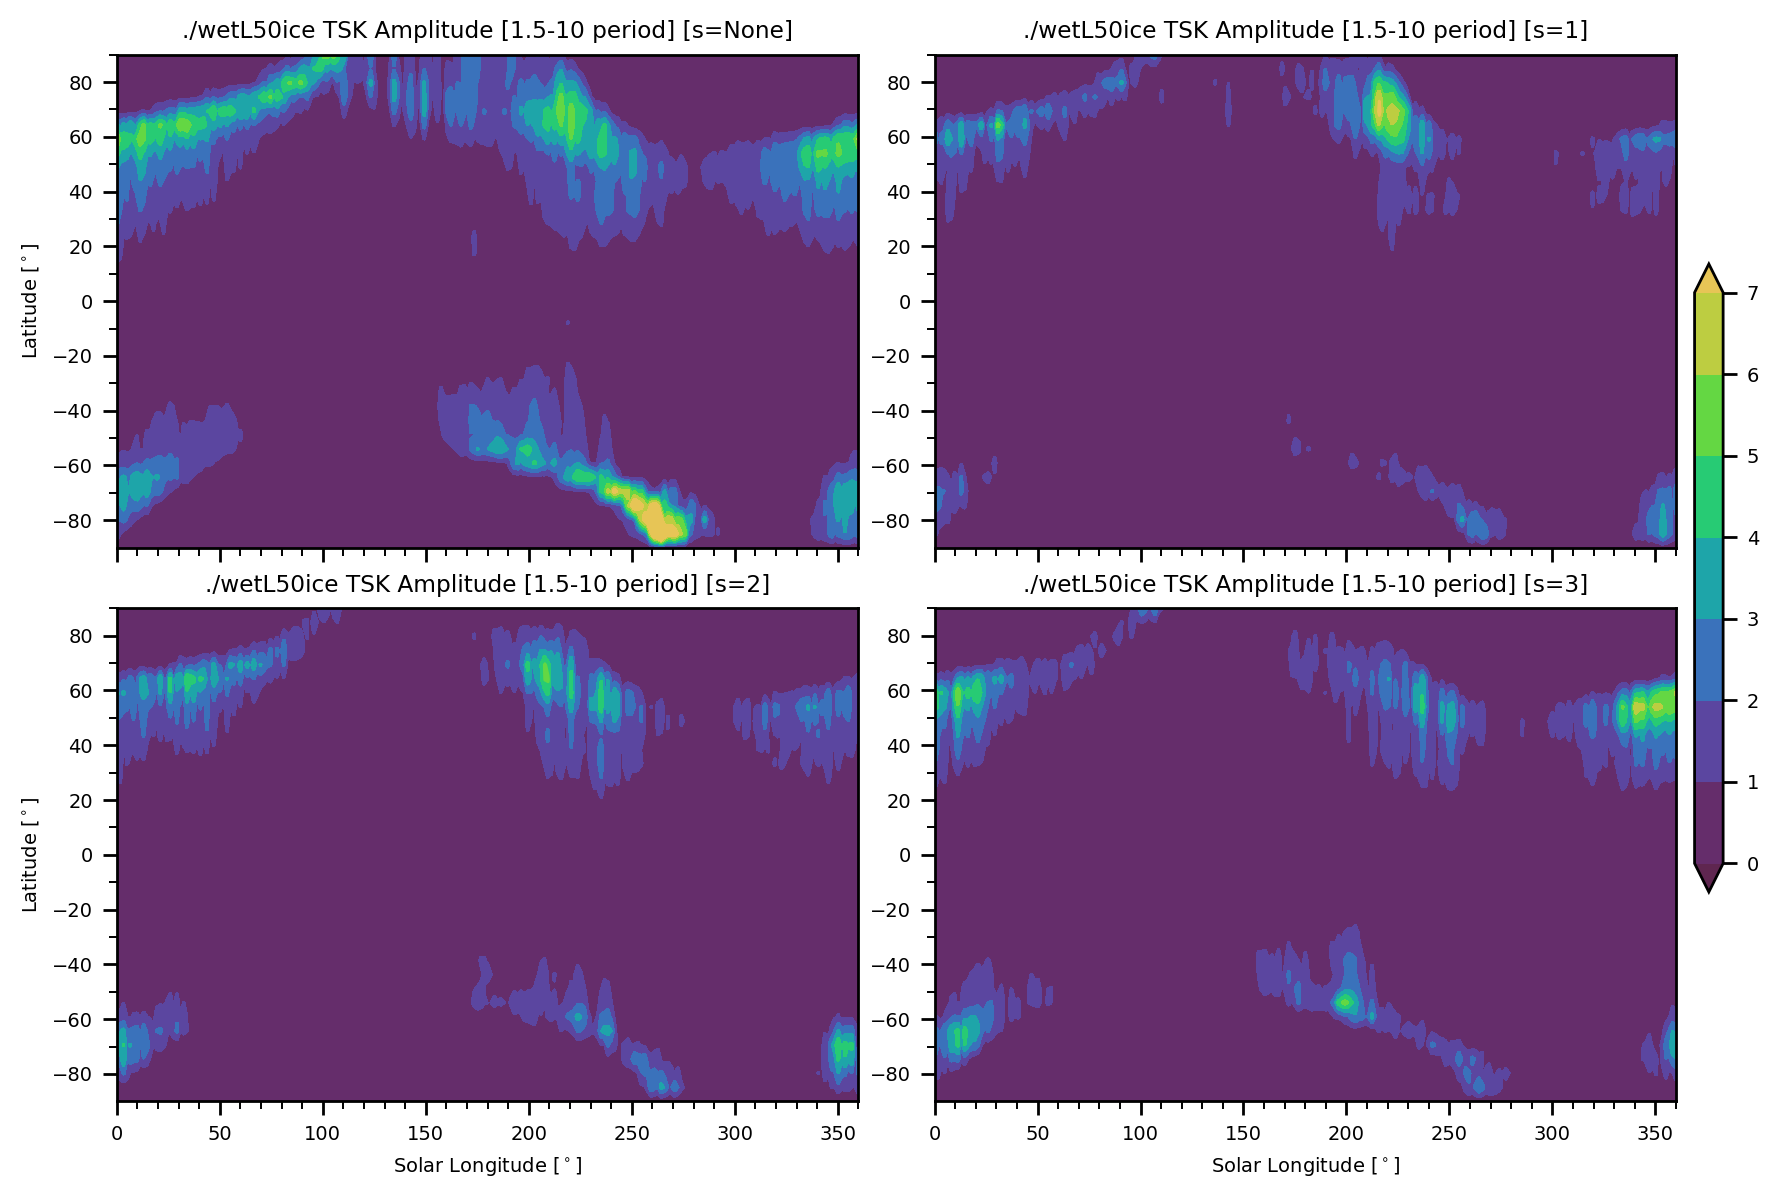

In [83]:
from matplotlib.backends.backend_pdf import PdfPages
    
T2km_filter_waven("./wetL50ice")

In [ ]:
T2km_filter_waven("./wetL50")

In [ ]:
T2km_filter_waven("./wetL50_ld")

In [ ]:
bandpass_filter('./r14p1_partial.nc')

In [ ]:
bandpass_filter('./r14p1_partial.nc')

In [92]:
data = Dataset('./wetL50_auxhist8.nc','r')
trc_ic = data.variables['TRC_IC'][:]
dust_sed = data.variables['DUSTN_SED'][:]
ls = data.variables['LS'][:]
data.close()

trc_ic = martians_year(ls, trc_ic)
dust_sed = martians_year(ls, dust_sed)

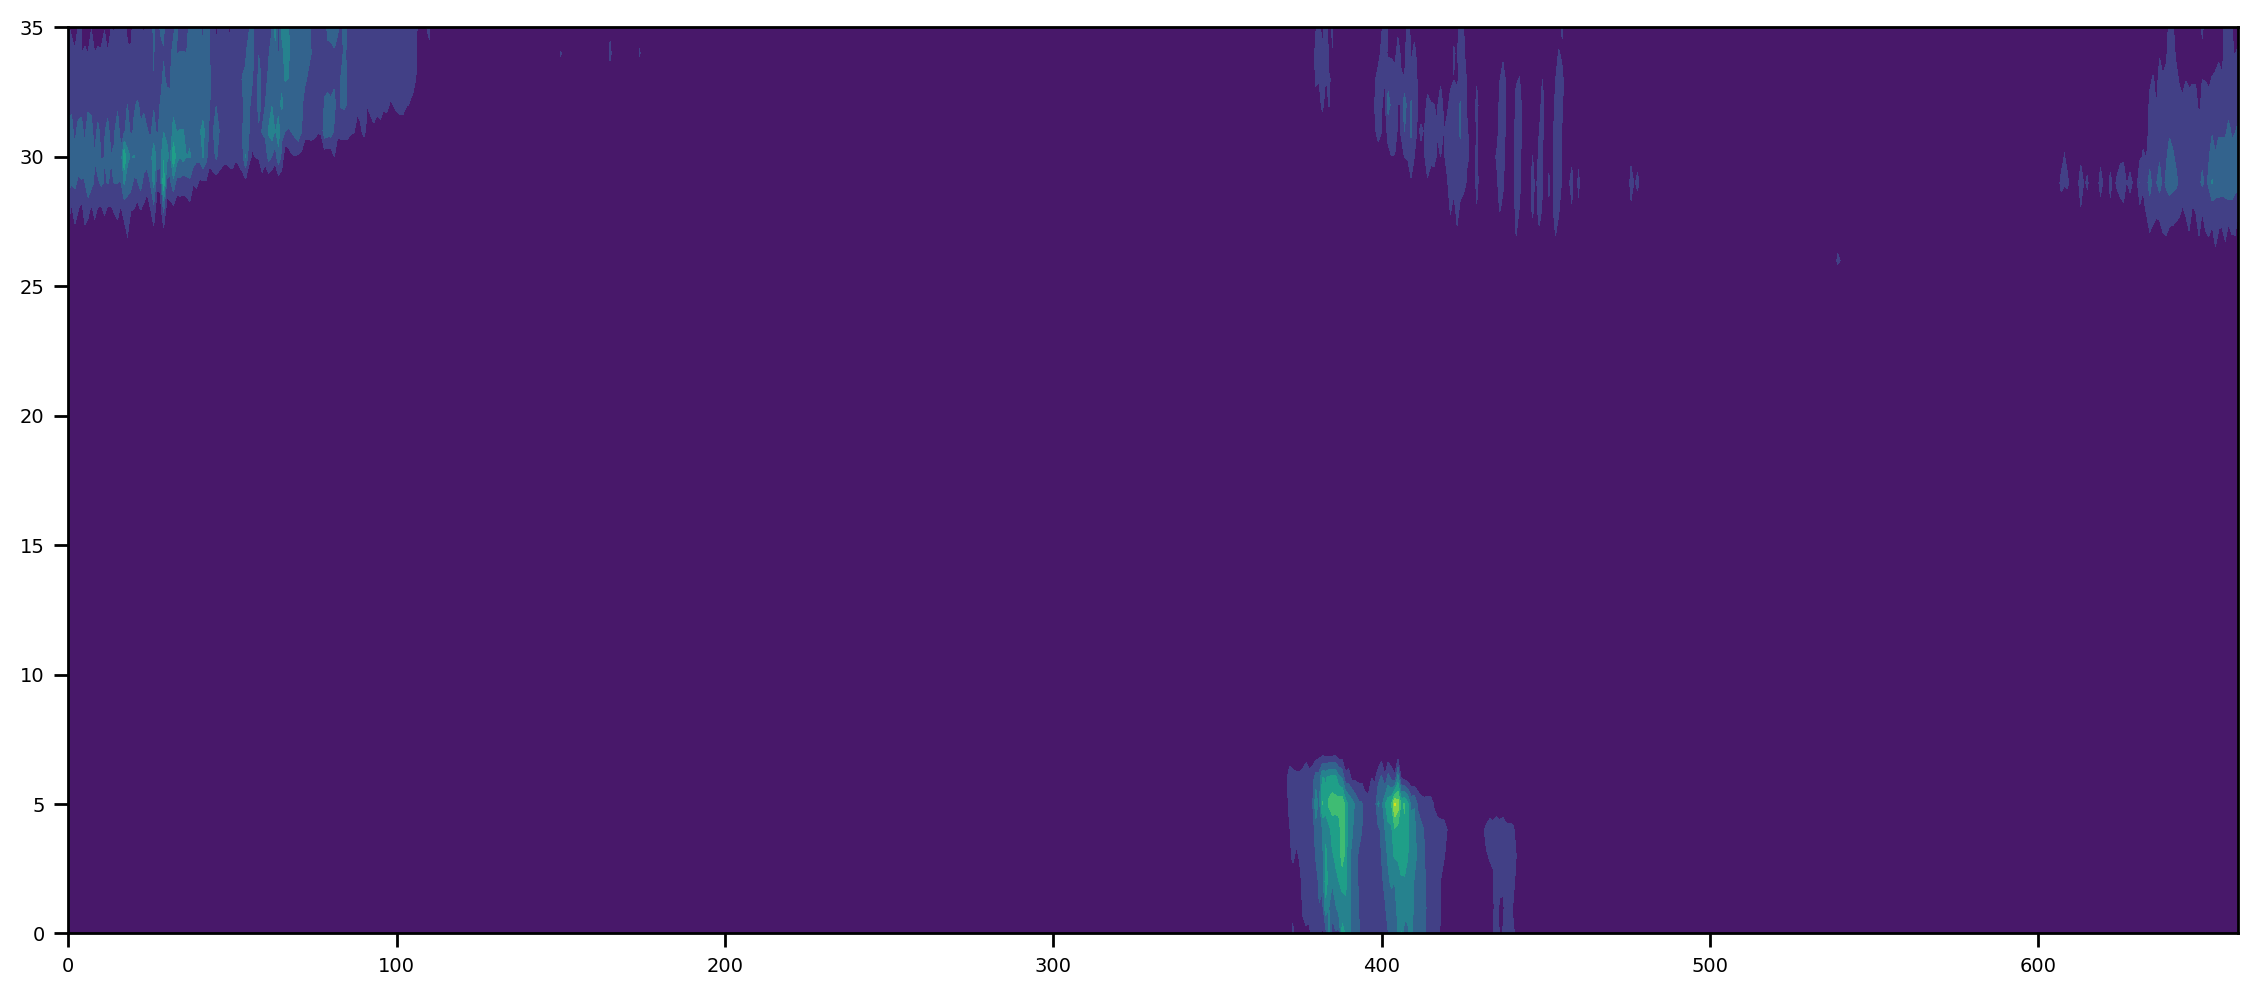

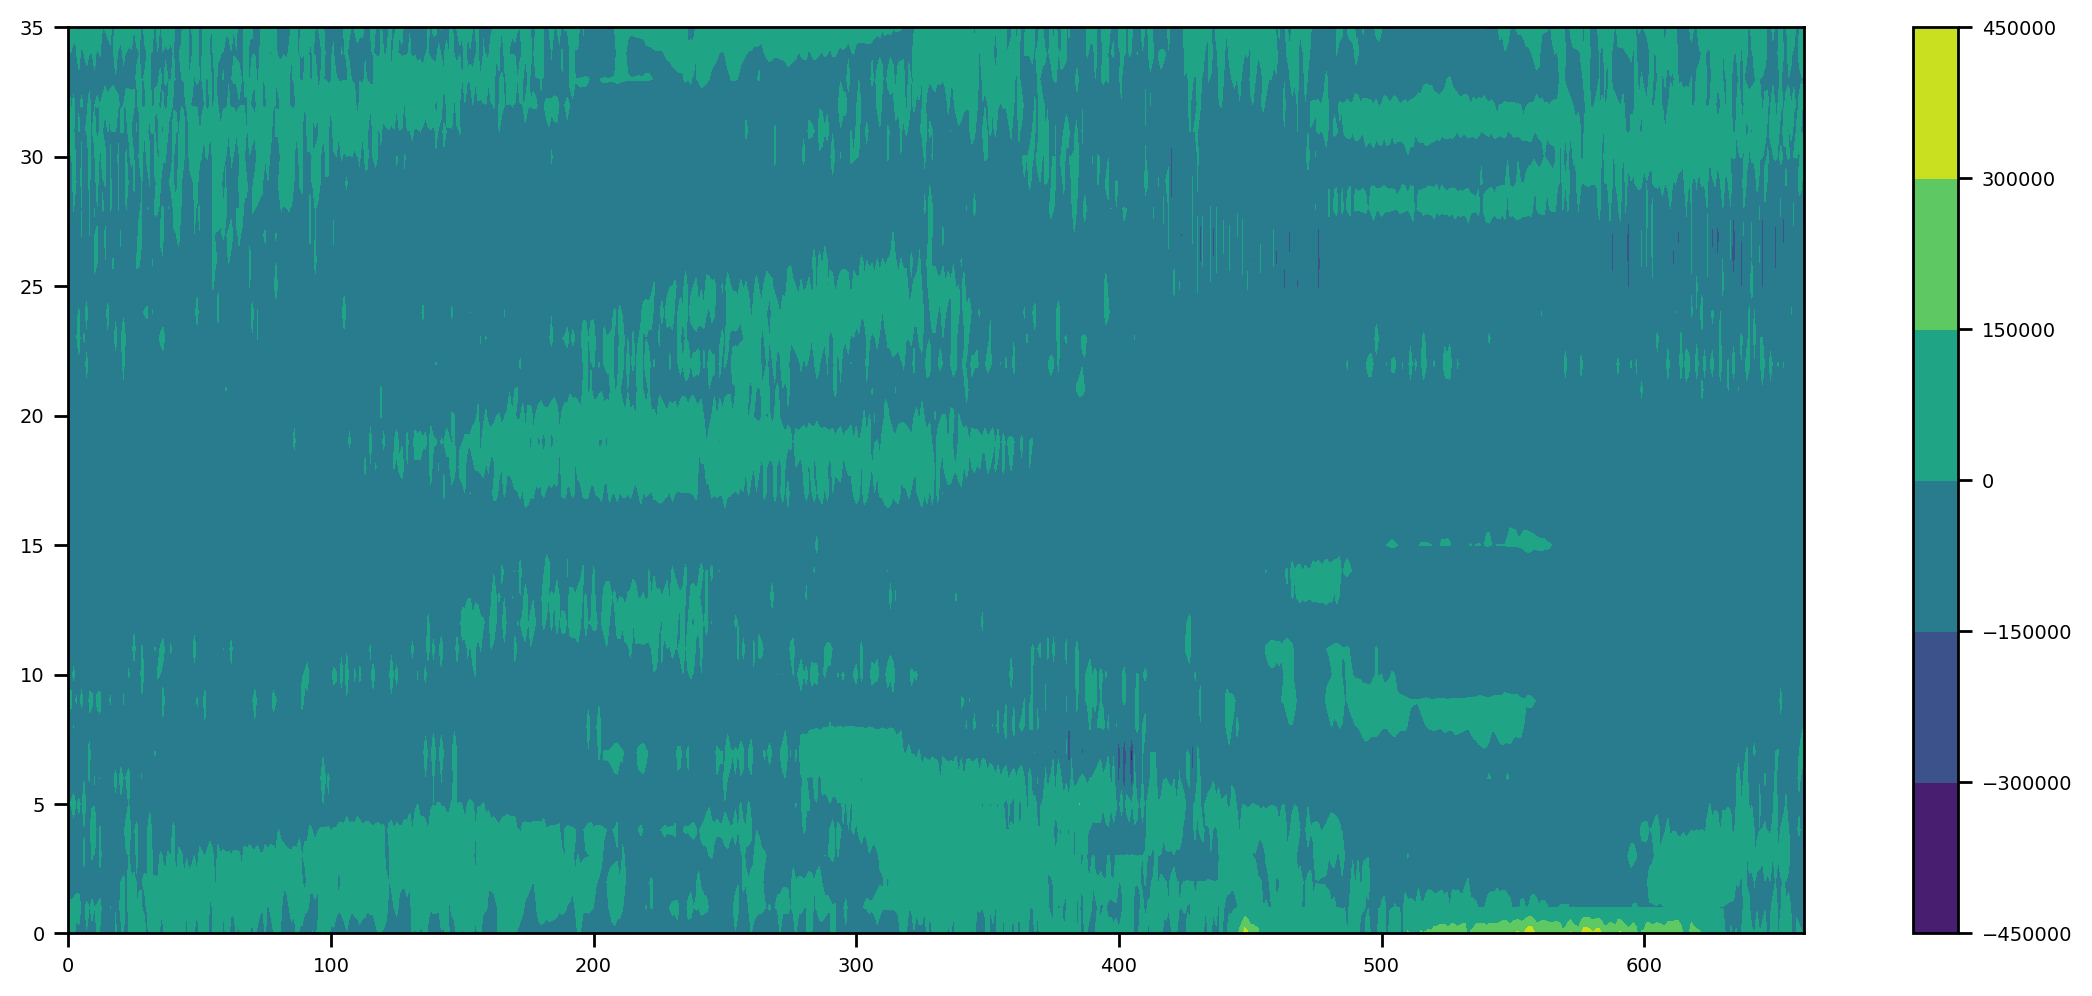

In [97]:
trc_ic.shape
contourf(trc_ic[:, 4:6].mean(axis=1).T)

figure(2)
dust_sed.shape
contourf(dust_sed[:,0:2].mean(axis=1).T)
colorbar()

In [ ]:
import matplotlib.pyplot as plt
contourf(qi[2])
colorbar()